In [190]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import svm

sns.set(rc={'figure.figsize':(10,7.5)})

1. This problem involves hyperplanes in two dimensions.

(a) Sketch the hyperplane `1 + 3X1 − X2 = 0`. Indicate the set of points for which `1+3X1 −X2 > 0`, as well as the set of points for which `1 + 3X1 − X2 < 0`

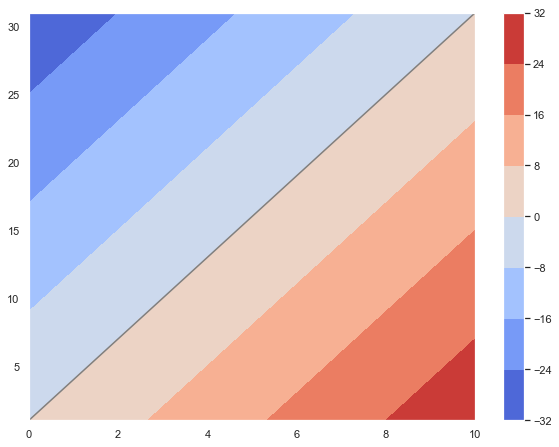

In [171]:
# points on the hyperplane
x1 = np.linspace(0, 10, 2)
x2 = (3 * x1) + 1

# plot the hyperplane
sns.lineplot(x=x1, y=x2, color='tab:gray')

# plot the contours
xx1 = np.linspace(x1.min(), x1.max(), 20)
xx2 = np.linspace(x2.min(), x2.max(), 20)
xx1, xx2 = np.meshgrid(xx1, xx2)
zz = (1 + (3 * xx1.ravel()) - xx2.ravel()).reshape(xx1.shape)
plt.contourf(xx1, xx2, zz, cmap='coolwarm')
plt.colorbar()

(b) On the same plot, sketch the hyperplane `−2 + X1 + 2X2 = 0`. Indicate the set of points for which `−2 + X1 + 2X2 > 0`, as well as the set of points for which `−2 + X1 + 2X2 < 0`.

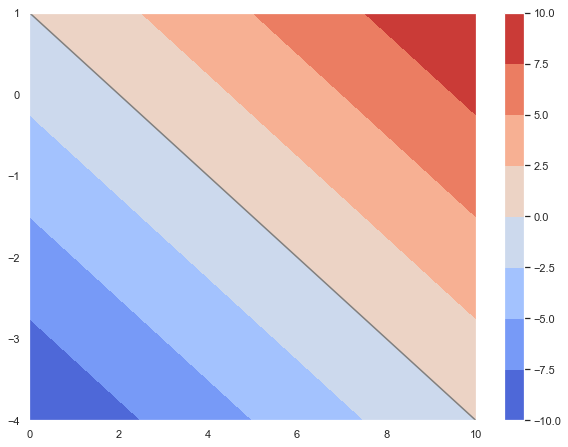

In [174]:
# points on the hyperplane
x1 = np.linspace(0, 10, 2)
x2 = 1 - (x1 / 2)

# plot the hyperplane
sns.lineplot(x=x1, y=x2, color='tab:gray')

# plot the contours
xx1 = np.linspace(x1.min(), x1.max(), 20)
xx2 = np.linspace(x2.min(), x2.max(), 20)
xx1, xx2 = np.meshgrid(xx1, xx2)
zz = (-2 + xx1.ravel() + (2 * xx2.ravel())).reshape(xx1.shape)
plt.contourf(xx1, xx2, zz,cmap='coolwarm')
plt.colorbar()

2. We have seen that in `p = 2` dimensions, a linear decision boundary takes the form `β0 +β1X1 +β2X2 = 0`. We now investigate a non-linear decision boundary.

(a) Sketch the curve `(1+X1)2 +(2−X2)2 = 4.`

(b) On your sketch, indicate the set of points for which `(1+X1)2 +(2−X2)2 >4`,
as well as the set of points for which `(1+X1)2 +(2−X2)2 ≤4`.

(c) Suppose that a classifier assigns an observation to the blue class if `(1+X1)2 +(2−X2)2 >4` and to the red class otherwise. To what class are the observations classified:

`(0, 0)`: R

`(−1, 1)`: B

`(2, 2)`: B

`(3, 8)`: B

(d) Argue that while the decision boundary in (c) is not linear in terms of `X1 and X2`, it is linear in terms of `X1, X1^2, X2, and X2`.

.. observe its construction in code below from a linear combination of `X1, X1^2, X2, and X2`.

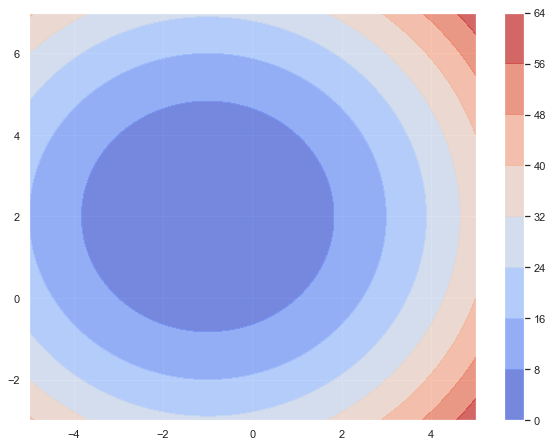

In [185]:
# plot the contours
x1 = np.linspace(-5, 5, 100)
x2 = np.linspace(-3, 7, 100)
xx1, xx2 = np.meshgrid(x1, x2)
df = pd.DataFrame({'x1' : xx1.ravel(),
                   'x2' : xx2.ravel(),
                   'x1_sq' : xx1.ravel() ** 2,
                   'x2_sq' : xx2.ravel() ** 2,
                   'x1_i_sq' : np.repeat(1, xx1.ravel().shape[0]),
                   'x2_i_sq' : np.repeat(4, xx1.ravel().shape[0])})
coeff = pd.DataFrame([2,-4,1,1,1,1], index=df.columns)
zz = (df @ coeff).values.reshape(xx1.shape)
plt.contourf(x1, x2, zz,cmap='coolwarm', alpha=0.75)
plt.colorbar()

3. Here we explore the maximal margin classifier on a toy data set.

In [251]:
toy_df = pd.DataFrame({'obs': np.arange(1, 8),
                       'x1' : [3,2,4,1,2,4,4],
                       'x2' : [4,2,4,4,1,3,1],
                       'y' : ['R','R','R', 'R', 'B','B','B']})

(a) We are given `n = 7` observations in `p = 2` dimensions. For each observation, there is an associated class label. Sketch the observations.

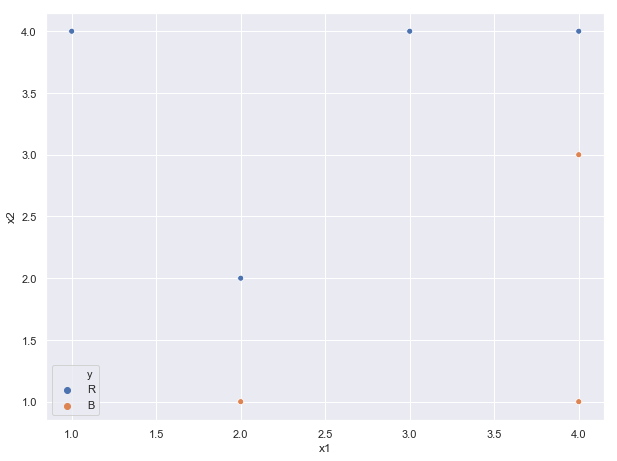

In [252]:
sns.scatterplot(x='x1', y='x2', hue='y', data=toy_df)

(b) Sketch the optimal separating hyperplane, and provide the equation for this hyperplane (of the form (9.1)).

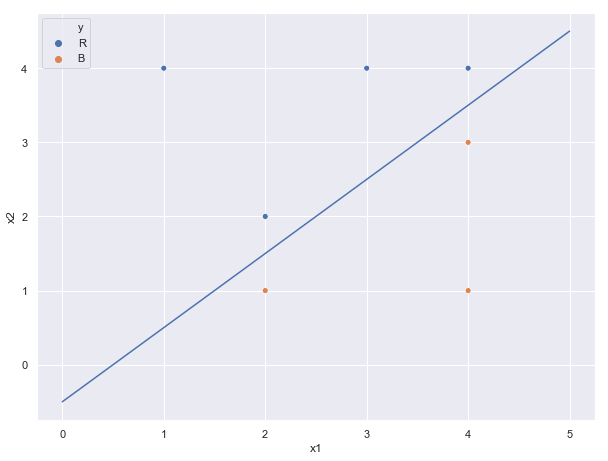

In [276]:
# obtain the hyperplane
clf = svm.SVC(kernel='linear', C=10^6)
clf.fit(toy_df.drop(['y', 'obs'], axis=1), toy_df.y)

# obtain the coefficients
coefs = pd.DataFrame(clf.coef_, columns=['x1', 'x2'])
coefs['i'] = pd.Series(clf.intercept_)

# plot the hyperplane
x1 = np.linspace(0, 5, 2)
x2 = (-coefs['x1'][0] * x1 - coefs['i'][0]) / coefs['x2'][0]
sns.scatterplot(x='x1', y='x2', hue='y', data=toy_df)
sns.lineplot(x=x1, y=x2)

(c) Describe the classification rule for the maximal margin classifier. It should be something along the lines of “Classify to Red if β0 + β1X1 + β2X2 > 0, and classify to Blue otherwise.” Provide the values for β0, β1, and β2.

In [277]:
coefs

,x1,x2,i
0,-1.999414,1.999414,0.999707


(d) On your sketch, indicate the margin for the maximal margin hyperplane.

(e) Indicate the support vectors for the maximal margin classifier.

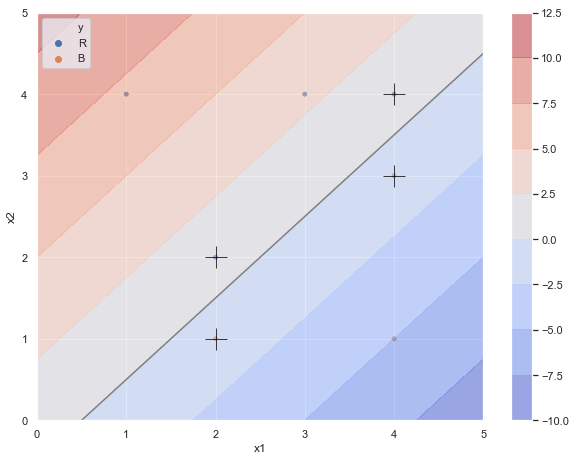

In [292]:
# plot the points
sns.scatterplot(x='x1', y='x2', hue='y', data=toy_df)

# plot the hyperplane
x1 = np.linspace(0.5, 5, 2)
x2 = (-coefs['x1'][0] * x1 - coefs['i'][0]) / coefs['x2'][0]
sns.lineplot(x=x1, y=x2, color='tab:gray')

# plot the contours
x1 = np.linspace(0, 5, 50)
x2 = np.linspace(0, 5, 50)
xx1, xx2 = np.meshgrid(x1, x2)
df = pd.DataFrame({'i' : np.repeat(1, xx1.ravel().shape[0]),
                   'x1' : xx1.ravel(),
                   'x2' : xx2.ravel()})
zz = df @ coefs.T
plt.contourf(xx1, xx2, zz.values.reshape(xx1.shape), cmap='coolwarm', alpha=0.5)
plt.colorbar()

# plot the support vectors
sns.scatterplot(x=clf.support_vectors_[:,0], \
                y=clf.support_vectors_[:,1], \
                color='black', marker='+', s=500)

(f) Argue that a slight movement of the seventh observation would not affect the maximal margin hyperplane.

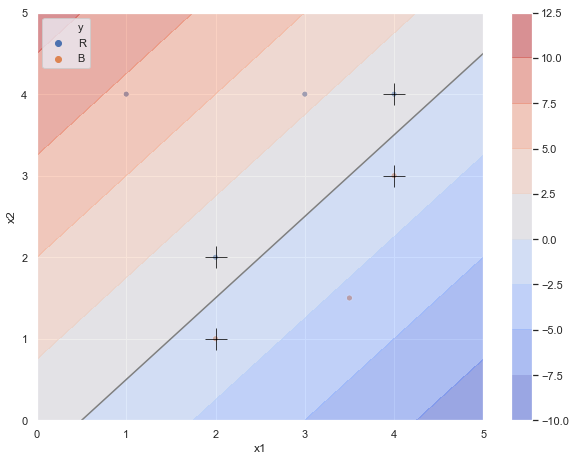

In [310]:
# move the 7th point
toy_df_2 = pd.DataFrame({'obs': np.arange(1, 8),
                         'x1' : [3,2,4,1,2,4,3.5],
                         'x2' : [4,2,4,4,1,3,1.5],
                         'y' : ['R','R','R', 'R', 'B','B','B']})
# plot the points
sns.scatterplot(x='x1', y='x2', hue='y', data=toy_df_2)

# obtain the hyperplane
clf = svm.SVC(kernel='linear', C=10^6)
clf.fit(toy_df_2.drop(['y', 'obs'], axis=1), toy_df_2.y)

# obtain the coefficients
coefs = pd.DataFrame(clf.coef_, columns=['x1', 'x2'])
coefs['i'] = pd.Series(clf.intercept_)

# plot the hyperplane
x1 = np.linspace(0.5, 5, 2)
x2 = (-coefs['x1'][0] * x1 - coefs['i'][0]) / coefs['x2'][0]
sns.lineplot(x=x1, y=x2, color='tab:gray')

# plot the contours
x1 = np.linspace(0, 5, 50)
x2 = np.linspace(0, 5, 50)
xx1, xx2 = np.meshgrid(x1, x2)
df = pd.DataFrame({'i' : np.repeat(1, xx1.ravel().shape[0]),
                   'x1' : xx1.ravel(),
                   'x2' : xx2.ravel()})
zz = df @ coefs.T
plt.contourf(xx1, xx2, zz.values.reshape(xx1.shape), cmap='coolwarm', alpha=0.5)
plt.colorbar()

# plot the support vectors
sns.scatterplot(x=clf.support_vectors_[:,0], \
                y=clf.support_vectors_[:,1], \
                color='black', marker='+', s=500)

(g) Sketch a hyperplane that is not the optimal separating hyperplane, and provide the equation for this hyperplane.

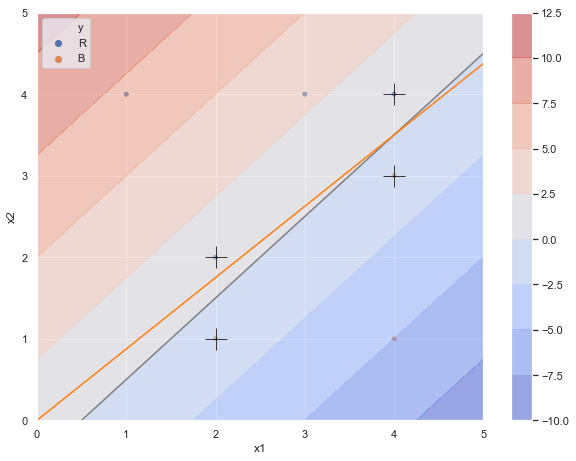

In [311]:
# plot the points
sns.scatterplot(x='x1', y='x2', hue='y', data=toy_df)

# plot the hyperplane
x1 = np.linspace(0.5, 5, 2)
x2 = (-coefs['x1'][0] * x1 - coefs['i'][0]) / coefs['x2'][0]
sns.lineplot(x=x1, y=x2, color='tab:gray')

# plot the contours
x1 = np.linspace(0, 5, 50)
x2 = np.linspace(0, 5, 50)
xx1, xx2 = np.meshgrid(x1, x2)
df = pd.DataFrame({'i' : np.repeat(1, xx1.ravel().shape[0]),
                   'x1' : xx1.ravel(),
                   'x2' : xx2.ravel()})
zz = df @ coefs.T
plt.contourf(xx1, xx2, zz.values.reshape(xx1.shape), cmap='coolwarm', alpha=0.5)
plt.colorbar()

# plot the support vectors
sns.scatterplot(x=clf.support_vectors_[:,0], \
                y=clf.support_vectors_[:,1], \
                color='black', marker='+', s=500)

## END COPY PASTED FROM ABOVE #

# plot another hyerplane that is not the optimal hyperplane

b1 = 1.75
b2 = 2
i = 0
x1 = np.linspace(0, 5, 2)
x2 = (b1 * x1 - i) / b2
sns.lineplot(x=x1, y=x2, color='tab:orange')

(h) Draw an additional observation on the plot so that the two classes are no longer separable by a hyperplane.

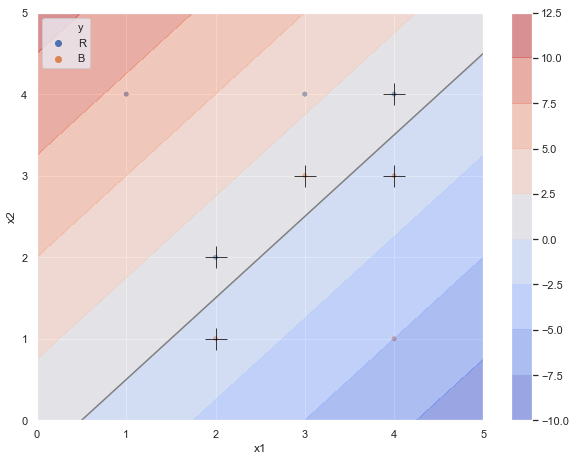

In [316]:
# move the 7th point
toy_df_2 = pd.DataFrame({'obs': np.arange(1, 9),
                         'x1' : [3,2,4,1,2,4,4,3],
                         'x2' : [4,2,4,4,1,3,1,3],
                         'y' : ['R','R','R', 'R', 'B','B','B', 'B']})
# plot the points
sns.scatterplot(x='x1', y='x2', hue='y', data=toy_df_2)

# obtain the hyperplane
clf = svm.SVC(kernel='linear', C=10^3)
clf.fit(toy_df_2.drop(['y', 'obs'], axis=1), toy_df_2.y)

# obtain the coefficients
coefs = pd.DataFrame(clf.coef_, columns=['x1', 'x2'])
coefs['i'] = pd.Series(clf.intercept_)

# plot the hyperplane
x1 = np.linspace(0.5, 5, 2)
x2 = (-coefs['x1'][0] * x1 - coefs['i'][0]) / coefs['x2'][0]
sns.lineplot(x=x1, y=x2, color='tab:gray')

# plot the contours
x1 = np.linspace(0, 5, 50)
x2 = np.linspace(0, 5, 50)
xx1, xx2 = np.meshgrid(x1, x2)
df = pd.DataFrame({'i' : np.repeat(1, xx1.ravel().shape[0]),
                   'x1' : xx1.ravel(),
                   'x2' : xx2.ravel()})
zz = df @ coefs.T
plt.contourf(xx1, xx2, zz.values.reshape(xx1.shape), cmap='coolwarm', alpha=0.5)
plt.colorbar()

# plot the support vectors
sns.scatterplot(x=clf.support_vectors_[:,0], \
                y=clf.support_vectors_[:,1], \
                color='black', marker='+', s=500)